<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/EDPHiperbolicasParabolicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

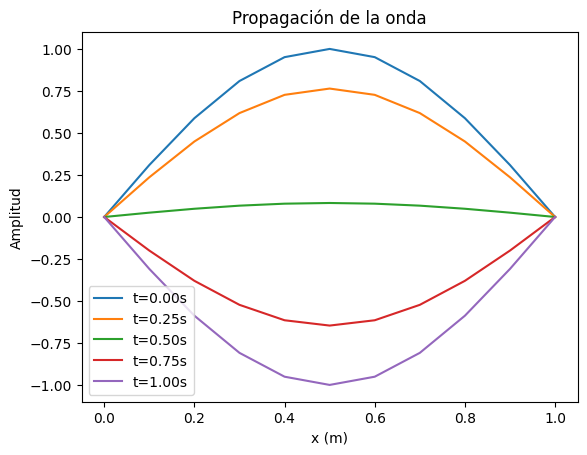

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
L = 1.0        # Longitud de la cuerda
T = 1.0        # Tiempo de simulación
c = 1.0        # Velocidad de propagación
dx = 0.1       # Paso espacial
dt = 0.05      # Paso temporal

Nx = int(L / dx) + 1
Nt = int(T / dt) + 1
x = np.linspace(0, L, Nx)
u = np.zeros((Nt, Nx))

# Condiciones iniciales
u[0, :] = np.sin(np.pi * x)  # Perturbación inicial
u[:, 0] = 0                 # Extremo izquierdo fijo
u[:, -1] = 0                # Extremo derecho fijo
u[1, 1:-1] = u[0, 1:-1]     # Velocidad inicial cero

# Iteración explícita
r = (c * dt / dx)**2
for n in range(1, Nt - 1):
    for i in range(1, Nx - 1):
        u[n+1, i] = 2*u[n, i] - u[n-1, i] + r*(u[n, i+1] - 2*u[n, i] + u[n, i-1])

# Graficar el resultado
for n in range(0, Nt, 5):  # Muestra cada 5 pasos de tiempo
    plt.plot(x, u[n, :], label=f't={n*dt:.2f}s')

plt.title("Propagación de la onda")
plt.xlabel("x (m)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()


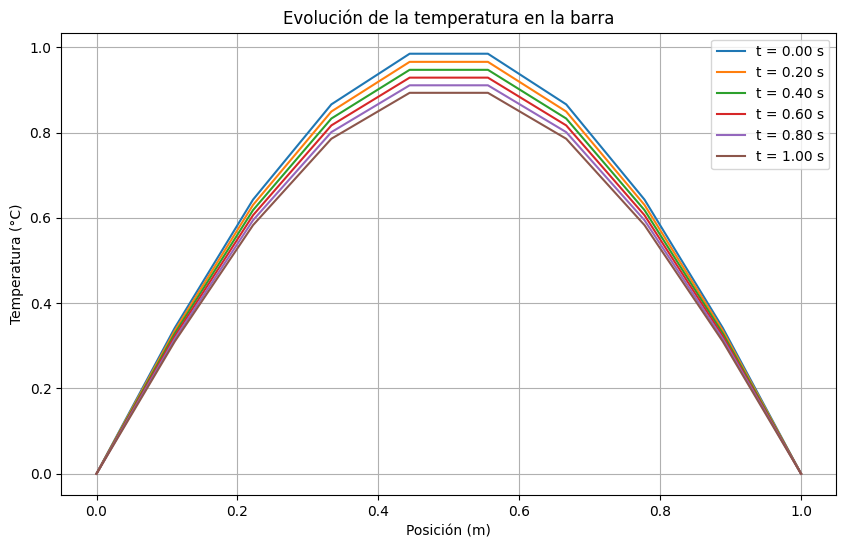

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros físicos
L = 1.0             # Longitud de la barra (m)
alpha = 0.01        # Coeficiente de difusión térmica (m^2/s)
T = 1.0             # Tiempo total de simulación (s)

# Parámetros de discretización
Nx = 10             # Número de puntos espaciales
Nt = 1000           # Número de pasos de tiempo
dx = L / (Nx - 1)   # Tamaño del paso espacial
dt = T / Nt         # Tamaño del paso temporal

# Condición de estabilidad: s = alpha * dt / dx^2
s = alpha * dt / dx**2
if s > 0.5:
    raise ValueError("El método explícito no es estable para estos parámetros.")

# Inicialización de las matrices
x = np.linspace(0, L, Nx)               # Puntos espaciales
u = np.sin(np.pi * x)                   # Condición inicial
u_new = np.zeros_like(u)                # Vector para el nuevo estado

# Condiciones de contorno: extremos fijos a 0°C
u[0], u[-1] = 0.0, 0.0

# Almacenamiento de resultados para visualización
results = [u.copy()]

# Iteración temporal
for n in range(Nt):
    for i in range(1, Nx-1):
        u_new[i] = u[i] + s * (u[i+1] - 2*u[i] + u[i-1])
    u[:] = u_new
    results.append(u.copy())

# Conversión a array para graficar
results = np.array(results)

# Graficar los resultados
plt.figure(figsize=(10, 6))
for i in range(0, Nt + 1, Nt // 5):  # Seleccionar 5 tiempos para mostrar
    plt.plot(x, results[i, :], label=f"t = {i * dt:.2f} s")
plt.title("Evolución de la temperatura en la barra")
plt.xlabel("Posición (m)")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.grid()
plt.show()
